# Dimensional Reduction and Benchmarking

## 1. Exploración y preprocesamiento de datos:

Cargamos los datos

Observando que los delimitadores están conformados por "\" hemos especificado el parametro "delimiter"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds_path = "data/train.csv"
df = pd.read_csv(ds_path)


Visualizamos la cabecera

In [2]:
df.head(10)

,No,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,AQI
0,1,-16,-4.0,1020.0,SE,1.79,0,0,129
1,2,-15,-4.0,1020.0,SE,2.68,0,0,148
2,3,-11,-5.0,1021.0,SE,3.57,0,0,159
3,4,-7,-5.0,1022.0,SE,5.36,1,0,181
4,5,-7,-5.0,1022.0,SE,6.25,2,0,138
5,6,-7,-6.0,1022.0,SE,7.14,3,0,109
6,7,-7,-6.0,1023.0,SE,8.93,4,0,105
7,8,-7,-5.0,1024.0,SE,10.72,0,0,124
8,9,-8,-6.0,1024.0,SE,12.51,0,0,120
9,10,-7,-5.0,1025.0,SE,14.30,0,0,132


Exploramos los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41757 entries, 0 to 41756
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   DEWP    41757 non-null  int64  
 2   TEMP    41757 non-null  float64
 3   PRES    41757 non-null  float64
 4   cbwd    41757 non-null  object 
 5   Iws     41757 non-null  float64
 6   Is      41757 non-null  int64  
 7   Ir      41757 non-null  int64  
 8   AQI     41757 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.9+ MB


Observamos los valores unicos de las variables categóricas

In [4]:
from utils.eda import get_categoric_columns
categoric_columns = get_categoric_columns(df)
for i in categoric_columns:
    print(i)
    print(df[i].unique())

cbwd
['SE' 'cv' 'NW' 'NE']


Continuamos con la exploración de los datos

Visualizamos las últimas entradas

In [5]:
df.tail(10)

,No,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,AQI
41747,41748,-27,1.0,1032.0,NW,196.21,0,0,9
41748,41749,-26,1.0,1032.0,NW,205.15,0,0,11
41749,41750,-23,0.0,1032.0,NW,214.09,0,0,8
41750,41751,-22,-1.0,1033.0,NW,221.24,0,0,9
41751,41752,-22,-2.0,1033.0,NW,226.16,0,0,10
41752,41753,-23,-2.0,1034.0,NW,231.97,0,0,8
41753,41754,-22,-3.0,1034.0,NW,237.78,0,0,10
41754,41755,-22,-3.0,1034.0,NW,242.70,0,0,10
41755,41756,-22,-4.0,1034.0,NW,246.72,0,0,8
41756,41757,-21,-3.0,1034.0,NW,249.85,0,0,12


Verificamos los valores descriptivos

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,41757.0,20879.000000,12054.351932,1.00,10440.00,20879.00,31318.00,41757.00
DEWP,41757.0,1.750174,14.433658,-40.00,-10.00,2.00,15.00,28.00
TEMP,41757.0,12.401561,12.175215,-19.00,2.00,14.00,23.00,42.00
PRES,41757.0,1016.442896,10.300733,991.00,1008.00,1016.00,1025.00,1046.00
Iws,41757.0,23.866747,49.617495,0.45,1.79,5.37,21.91,565.49
Is,41757.0,0.055344,0.778875,0.00,0.00,0.00,0.00,27.00
Ir,41757.0,0.194866,1.418165,0.00,0.00,0.00,0.00,36.00
AQI,41757.0,98.613215,92.050387,0.00,29.00,72.00,137.00,994.00


Continuamos con el analisis

In [7]:
df.describe(include='object').T

,count,unique,top,freq
cbwd,41757,4,SE,14573


### Identificación de valores nulos, duplicados y outliers

In [8]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


No se observan valores duplicados

Generamos Histogramas para visualizar la distribucion

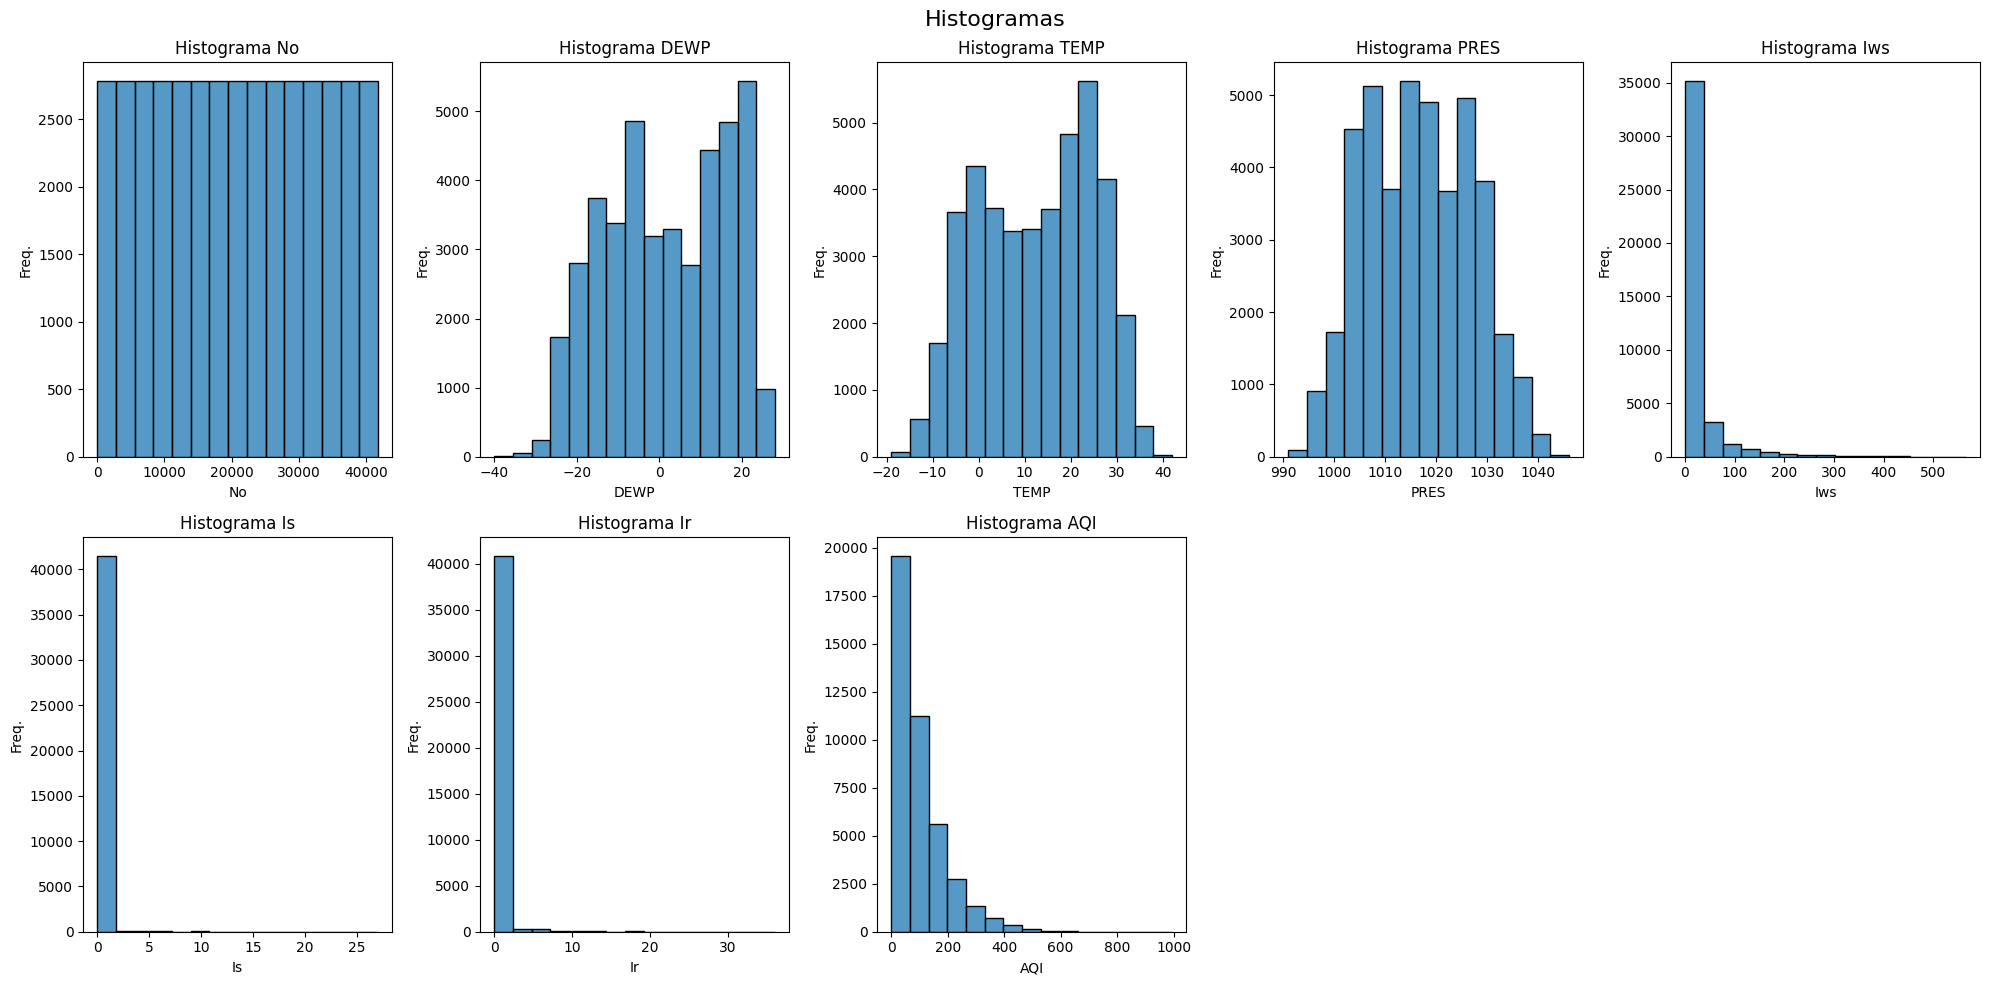

In [9]:
from utils.eda import graph_histogram, get_numeric_columns
graph_histogram(df, get_numeric_columns(df), bins=15, columns_number=5, figsize=(20, 10))

No se observa nada fuera de lo normal en los histogramas, algunos muestran un desplazamiento a la izquierda

In [10]:
from utils.eda import get_categoric_columns, clean_string

categoric_columns = get_categoric_columns(df)


for column in categoric_columns:
    df[column] = df[column].apply(clean_string)

In [11]:
object_columns = df.select_dtypes(include=["object", "string"]).columns.tolist()

Convertimos las columnas categoricas

In [12]:
categorical_columns = get_categoric_columns(df)
max_categorical_columns_percentage = 0.05
num_rows_df = df.shape[0]
columns_to_exclude = []
columns_converted_to_categorical = []
columns_converted_to_string = []

for column in categorical_columns:
    unique_values = df[column].dropna().unique().tolist()
    if len(unique_values) <= (max_categorical_columns_percentage * num_rows_df):

        print(f"Valores unicos en columna '{column}': {str(unique_values)}")
        print(f"Convertir '{column}' a categorical")
        df[column] = df[column].astype("category")
        columns_converted_to_categorical.append(column)
    else:
        print(f"Column '{column}' No se convierte a categorica, se conserva cómo string")
        df[column] = df[column].astype("string")
        columns_converted_to_string.append(column)

    del unique_values



Valores unicos en columna 'cbwd': ['se', 'cv', 'nw', 'ne']
Convertir 'cbwd' a categorical


Observamos la distribucion temporal

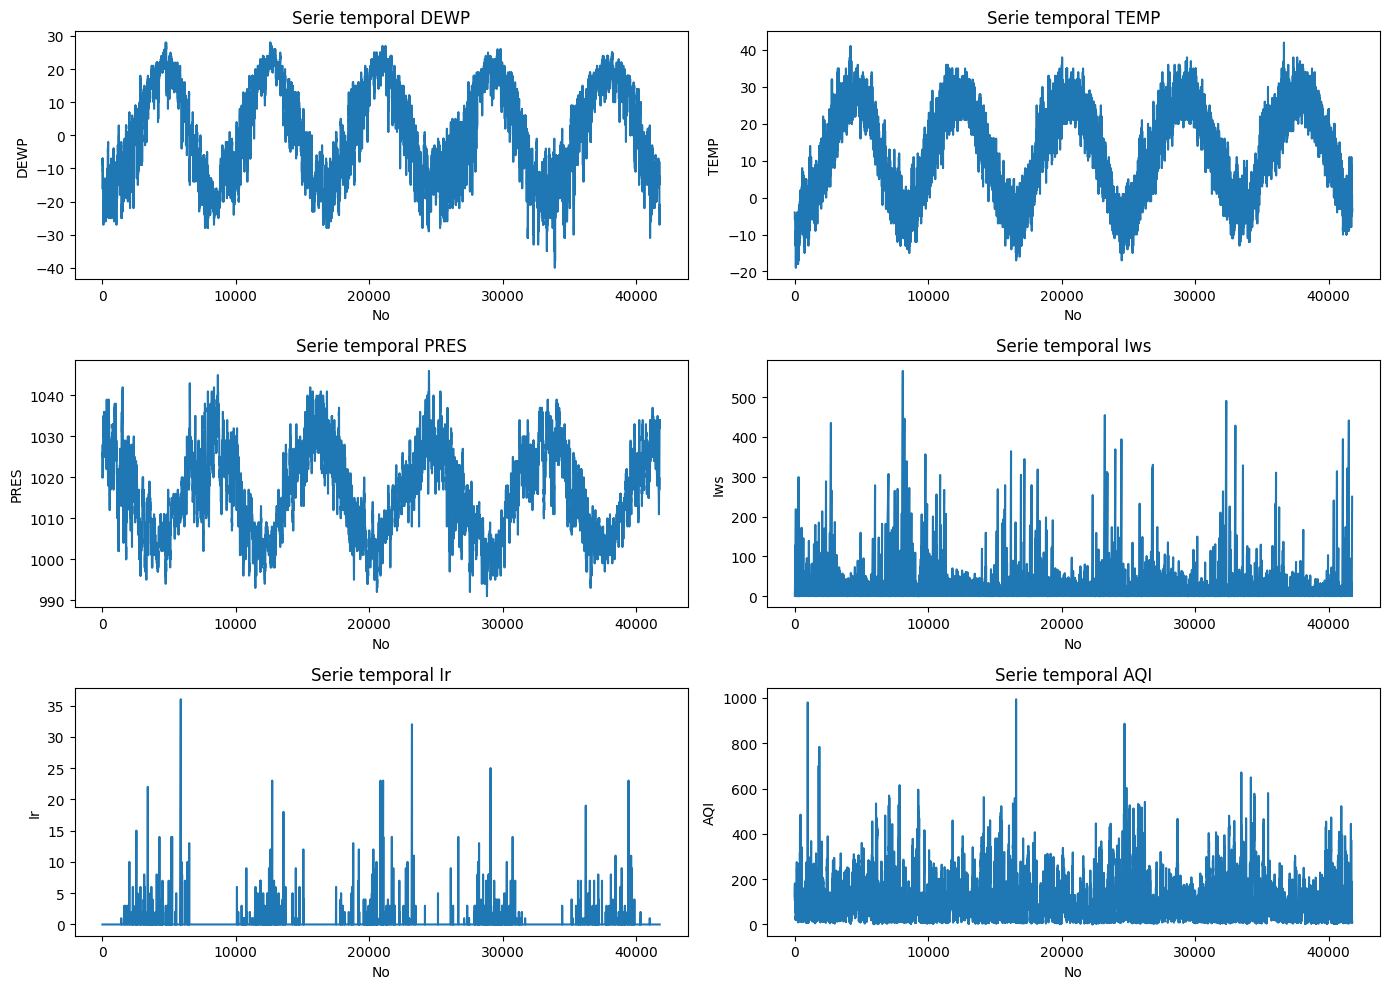

In [13]:
from utils.eda import graph_temporal_series
graph_temporal_series(df, ["DEWP", "TEMP", "PRES", "Iws", "Ir", "AQI"], "No", 2)

Ahora verificamos los outliers

In [14]:
from utils.eda import get_outliers_data
get_outliers_data(df)

,No,DEWP,TEMP,PRES,Iws,Is,Ir,AQI
N° Outliers,0.0,0.0,0.0,0.0,4893.000000,368.000000,1739.000000,1773.000000
% Outliers,0.0,0.0,0.0,0.0,11.717796,0.881289,4.164571,4.245995
Lim. mix,-20877.0,-47.5,-29.5,982.5,-28.390000,0.000000,0.000000,-133.000000
Lim. max,62635.0,52.5,54.5,1050.5,52.090000,0.000000,0.000000,299.000000


Visualizamos las gráficas de cajas de nuestras columnas

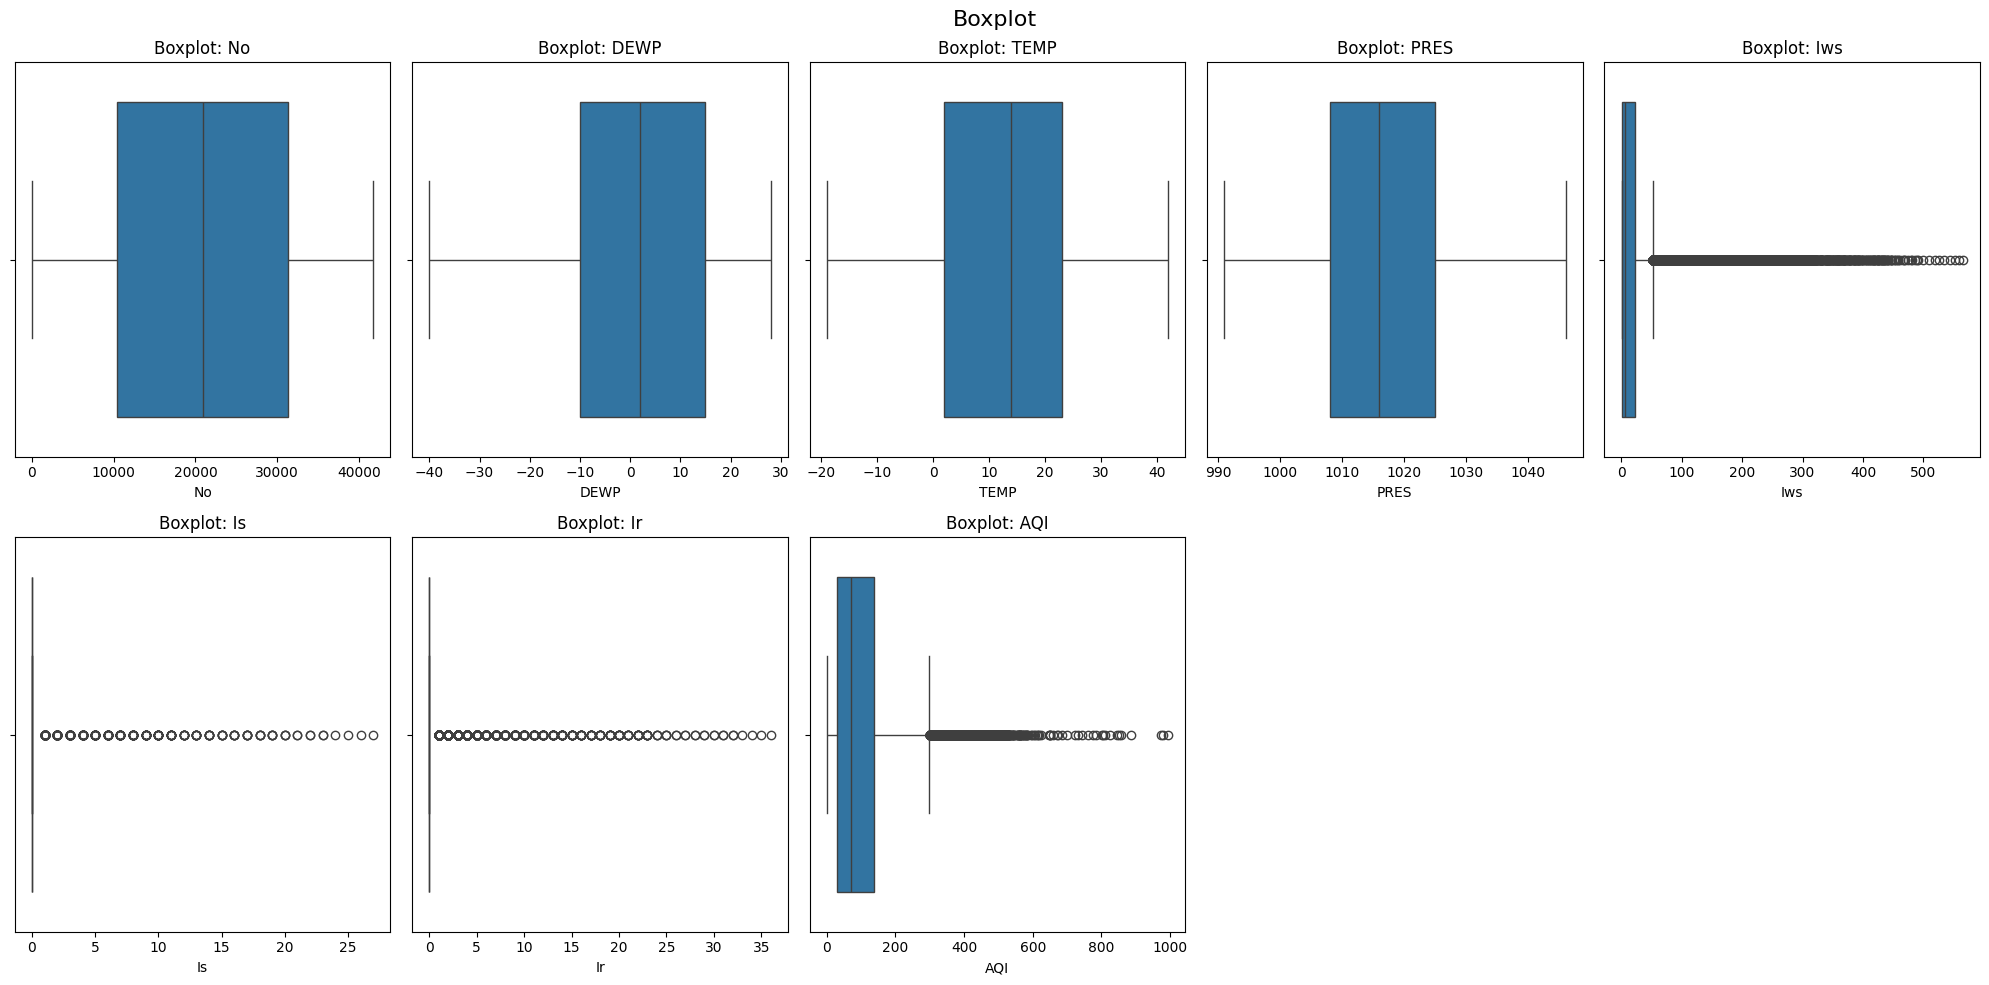

In [15]:
from utils.eda import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df), figsize=(20, 10), num_columns=5)

Observamos varios outliers por lo tanto es mejor aplicar RobustScaler

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [16]:
df.describe()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,AQI
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,20879.000000,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866,98.613215
std,12054.351932,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165,92.050387
min,1.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000
25%,10440.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,29.000000
50%,20879.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,72.000000
75%,31318.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,137.000000
max,41757.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000,994.000000


In [17]:
from utils.eda import get_descriptive_statistics
get_descriptive_statistics(df)

,No,DEWP,TEMP,PRES,Iws,Is,Ir,AQI
min,1.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000
max,41757.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000,994.000000
mean,20879.000000,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866,98.613215
std,12054.351932,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165,92.050387
median,20879.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,72.000000
variation_coefficient,0.577343,8.246986,0.981749,0.010134,2.078938,14.073332,7.277662,0.933449


Veremos las correlaciones entre las caracteristicas

In [18]:
from utils.eda import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,No,DEWP,TEMP,PRES,Iws,Is,Ir,AQI
No,1.000000,0.054172,0.089507,-0.026452,-0.063567,-0.032191,-0.017969,-0.018218
DEWP,0.054172,1.000000,0.823821,-0.777722,-0.293106,-0.034925,0.125341,0.171423
TEMP,0.089507,0.823821,1.000000,-0.826903,-0.149613,-0.094785,0.049544,-0.090534
PRES,-0.026452,-0.777722,-0.826903,1.000000,0.178871,0.070537,-0.080532,-0.047282
Iws,-0.063567,-0.293106,-0.149613,0.178871,1.000000,0.022630,-0.009157,-0.247784
Is,-0.032191,-0.034925,-0.094785,0.070537,0.022630,1.000000,-0.009764,0.019266
Ir,-0.017969,0.125341,0.049544,-0.080532,-0.009157,-0.009764,1.000000,-0.051369
AQI,-0.018218,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369,1.000000


Ahora graficamos el mapa de calor de las correlaciones

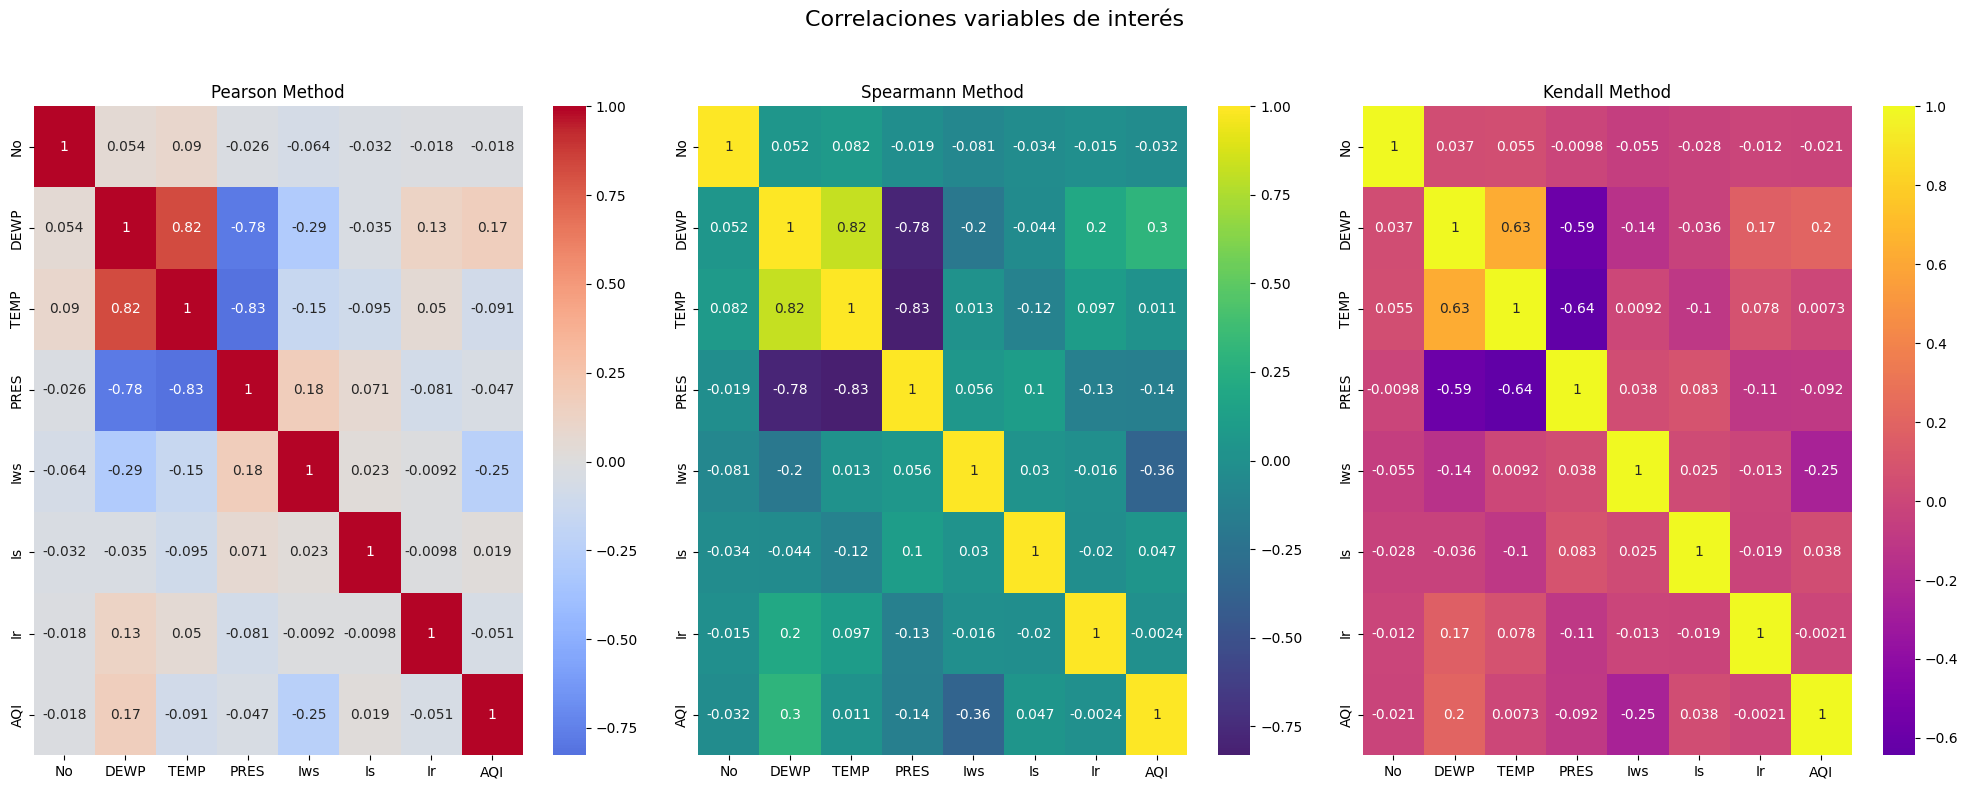

In [19]:
from utils.eda import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,8), num_columns=3)

Vemos que existen muchas correlaciones importantes

Importamos las librerias

In [20]:
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

from utils.eda import get_numeric_columns

from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

### Preparamos los datos para el entrenamiento

In [21]:
predict_columns = df.columns.tolist()
predict_columns.remove("AQI")
predict_columns.remove("No")
numeric_columns_for_scale = get_numeric_columns(df)
numeric_columns_for_scale.remove("AQI")
numeric_columns_for_scale.remove("No")
X = df[predict_columns]
print(X.columns)

Index(['DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')


In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler((0, 1)), numeric_columns_for_scale),
        ("onehot", OneHotEncoder(), ["cbwd",]),
    ],
    remainder="passthrough"
)

Realizamos la transformación

In [23]:
X_transf = preprocessor.fit_transform(X)

df_transf = pd.DataFrame(X_transf, columns=preprocessor.get_feature_names_out())

df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41757 entries, 0 to 41756
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num__DEWP        41757 non-null  float64
 1   num__TEMP        41757 non-null  float64
 2   num__PRES        41757 non-null  float64
 3   num__Iws         41757 non-null  float64
 4   num__Is          41757 non-null  float64
 5   num__Ir          41757 non-null  float64
 6   onehot__cbwd_cv  41757 non-null  float64
 7   onehot__cbwd_ne  41757 non-null  float64
 8   onehot__cbwd_nw  41757 non-null  float64
 9   onehot__cbwd_se  41757 non-null  float64
dtypes: float64(10)
memory usage: 3.2 MB


Preparamos el set de entrenamiento y el set de pruebas

In [24]:
import numpy as np

def split_multivariate_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequence):
            break
        seq_x = sequence[i:end_ix, :]
        seq_y = sequence[end_ix:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)


inputs = df[predict_columns]
inputs_scaled = preprocessor.fit_transform(inputs)

outputs = df[["AQI"]].values

data = np.append(inputs_scaled, outputs, axis=1)

n_steps_in = 1
n_steps_out = 1
X, y = split_multivariate_sequence(data, n_steps_in, n_steps_out)

Visualizamos el tamaño de nuestros sets

In [25]:
print(X.shape)
print(y.shape)

(41756, 1, 11)
(41756, 1)


Separamos nuestros sets

In [26]:
sep_index = split_index = int(len(df) * 0.7)

X_train = X[:sep_index]
X_test = X[sep_index:]
y_train = y[:sep_index]
y_test = y[sep_index:]

Preparamos el early stop

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Preparamos los parametros del modelo LSTM

In [28]:
model = Sequential([
    Input(shape=(1, 11)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,451 (48.64 KB)

 Trainable params: 12,451 (48.64 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamos el modelo

In [29]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks=[early_stopping],
)

Epoch 1/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 35.4957 - val_loss: 11.8485
Epoch 2/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 13.6938 - val_loss: 11.7849
Epoch 3/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 13.6589 - val_loss: 11.7669
Epoch 4/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13.6347 - val_loss: 11.7680
Epoch 5/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13.6117 - val_loss: 11.7758
Epoch 6/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13.6012 - val_loss: 11.7819
Epoch 7/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 13.5994 - val_loss: 11.7792
Epoch 8/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 13.5965 - val_loss: 11.7746


Visualizamos la curva de perdida

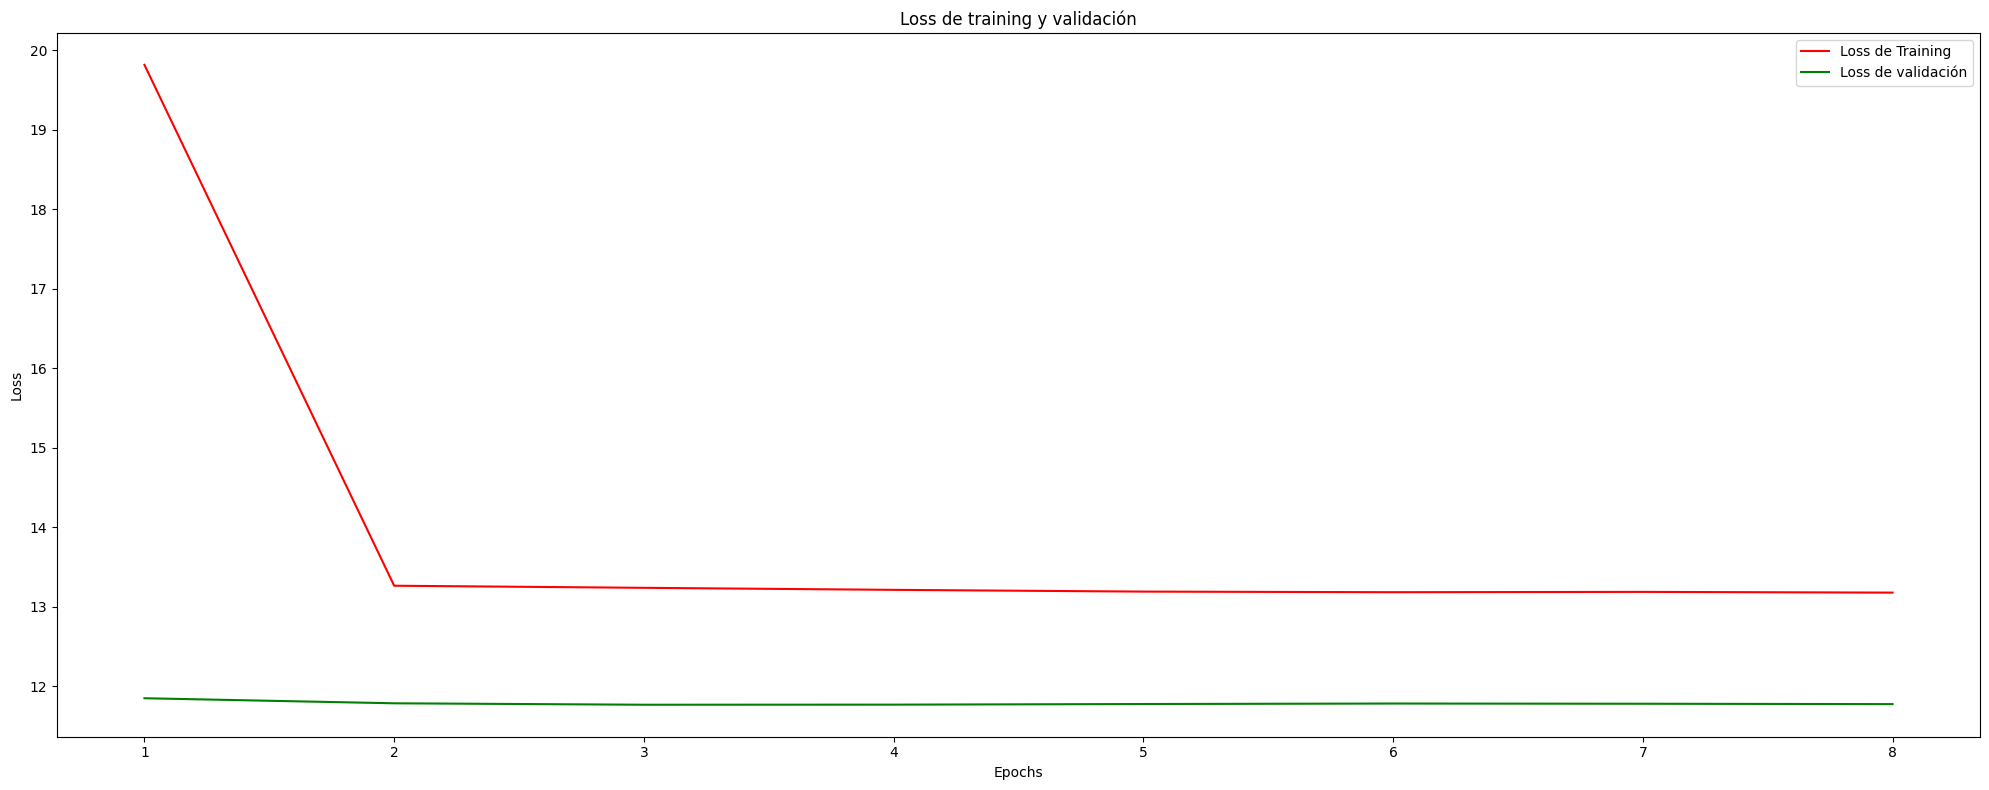

In [30]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
epochs = [i+1 for i in range(len(tr_loss))]
plt.figure(figsize= (20, 8))
plt.plot(epochs, tr_loss, 'r', label= 'Loss de Training')
plt.plot(epochs, val_loss, 'g', label= 'Loss de validación')
plt.title('Loss de training y validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Observamos las metricas

In [31]:
aqi_range = df["AQI"].max()-df["AQI"].min()
per_error = (val_lowest / aqi_range) * 100

print(f"Rango AQI: {aqi_range}")
print(f"Porcentaje Error: {per_error:.2f}%")

Rango AQI: 994
Porcentaje Error: 1.18%


Ahora implementaremos prophet

In [32]:
from prophet import Prophet
from datetime import timedelta

df_copy = df.copy()
df_copy.rename(columns={'AQI': 'y'}, inplace=True)

df_copy['ds'] = pd.date_range(start='2024-01-01', periods=len(df_copy), freq=timedelta(minutes=1))

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41757 entries, 0 to 41756
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   No      41757 non-null  int64         
 1   DEWP    41757 non-null  int64         
 2   TEMP    41757 non-null  float64       
 3   PRES    41757 non-null  float64       
 4   cbwd    41757 non-null  category      
 5   Iws     41757 non-null  float64       
 6   Is      41757 non-null  int64         
 7   Ir      41757 non-null  int64         
 8   y       41757 non-null  int64         
 9   ds      41757 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(3), int64(5)
memory usage: 2.9 MB


Preparamos los sets de entrenamiento y pruebas

In [33]:
sep_index = split_index = int(len(df_copy) * 0.7)

df_copy_train = df_copy.iloc[:sep_index]
df_copy_test = df_copy.iloc[sep_index:]

df_copy.columns.tolist()

['No', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'y', 'ds']

In [34]:
prophet_model = Prophet(interval_width=1.0)
prophet_model.add_regressor('DEWP')
prophet_model.add_regressor('TEMP')
prophet_model.add_regressor('PRES')
prophet_model.add_regressor('Iws')
prophet_model.add_regressor('Is')
prophet_model.add_regressor('Ir')

Entrenamos el modelo

In [35]:
prophet_model.fit(df_copy_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoix1h6hk/lpma9d0l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoix1h6hk/m19g6cbe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38095', 'data', 'file=/tmp/tmpoix1h6hk/lpma9d0l.json', 'init=/tmp/tmpoix1h6hk/m19g6cbe.json', 'output', 'file=/tmp/tmpoix1h6hk/prophet_model85nrda4j/prophet_model-20241220022352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:23:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:24:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
prophet_model.predict(df_copy_test)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2024-01-21 07:09:00,46.913350,-180.205629,268.753788
1,2024-01-21 07:10:00,46.818496,-184.888494,283.314801
2,2024-01-21 07:11:00,36.288898,-207.527279,268.019335
3,2024-01-21 07:12:00,41.820639,-162.946857,253.579677
4,2024-01-21 07:13:00,41.240627,-172.091446,314.386350
...,...,...,...,...
12523,2024-01-29 23:52:00,-828.591500,-8850.157117,8803.169995
12524,2024-01-29 23:53:00,-819.002655,-8843.424833,8722.332499
12525,2024-01-29 23:54:00,-819.535062,-8832.901181,8872.418960
12526,2024-01-29 23:55:00,-818.267016,-8845.799529,8781.826768


Comparamos los resultados

LSTM

In [37]:

y_pred_lstm = model.predict(X_test)

rmse_lstm = root_mean_squared_error(y_test, y_pred_lstm)
mse_lstm = rmse_lstm ** 2
r2_lstm = r2_score(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)

print(f'Error Cuadrático Medio LSTM: {mse_lstm}')
print(f'Error Cuadrático Medio Raíz LSTM: {rmse_lstm}')
print(f'R-cuadrado LSTM: {r2_lstm}')
print(f'Error Absoluto Medio LSTM: {mae_lstm}')

392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Error Cuadrático Medio LSTM: 456.73737064698076
Error Cuadrático Medio Raíz LSTM: 21.37141480218333
R-cuadrado LSTM: 0.9442737111736312
Error Absoluto Medio LSTM: 11.766901070001815


Prophet

In [42]:

y_pred_prophet = prophet_model.predict(df_copy_test)["yhat"]

rmse_prophet = root_mean_squared_error(df_copy_test["y"], y_pred_prophet)
mse_prophet = rmse_lstm ** 2
r2_prophet = r2_score(df_copy_test["y"], y_pred_prophet)
mae_prophet = mean_absolute_error(df_copy_test["y"], y_pred_prophet)

print(f'Error Cuadrático Medio Prophet: {mse_prophet}')
print(f'Error Cuadrático Medio Raíz Prophet: {rmse_prophet}')
print(f'R-cuadrado Prophet: {r2_prophet}')
print(f'Error Absoluto Medio Prophet: {mae_prophet}')

Error Cuadrático Medio Prophet: 456.73737064698076
Error Cuadrático Medio Raíz Prophet: 418.56885415011857
R-cuadrado Prophet: -20.377406817959848
Error Absoluto Medio Prophet: 359.7115683153832


Graficamos la dispersion para ambos modelos

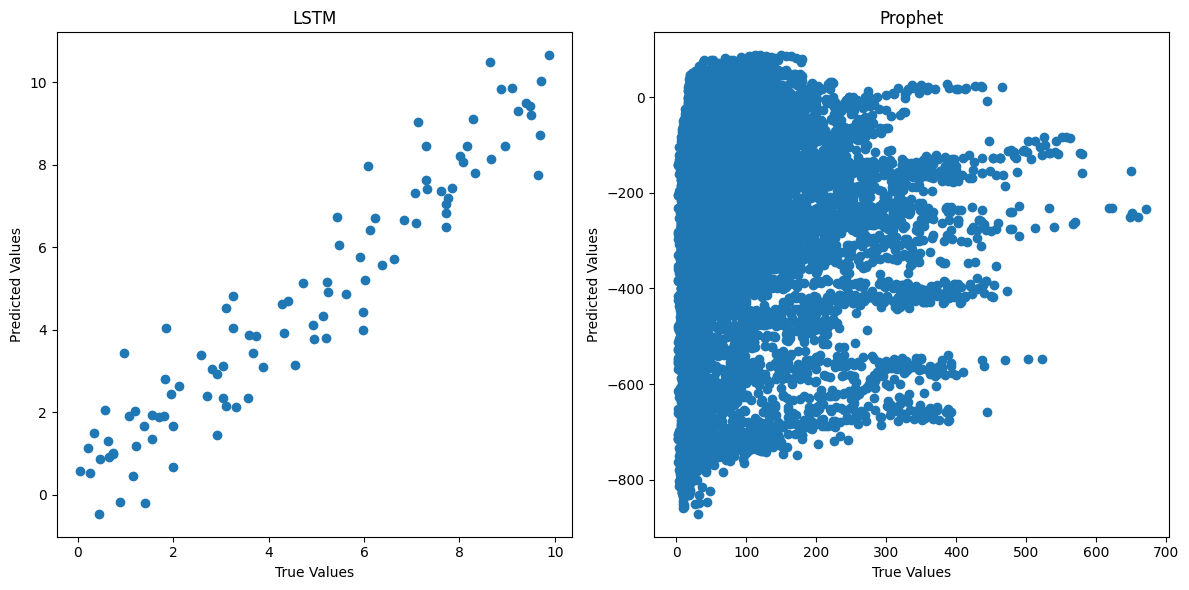

In [41]:
np.random.seed(42)
y_test = np.random.rand(100) * 10
y_pred_lstm = y_test + np.random.normal(0, 1, size=100)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(y_test.flatten(), y_pred_lstm.flatten())
axes[0].set_title('LSTM')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predicted Values')
axes[1].scatter(df_copy_test["y"], y_pred_prophet)
axes[1].set_title('Prophet')
axes[1].set_xlabel('True Values')
axes[1].set_ylabel('Predicted Values')
plt.tight_layout()
plt.show()


## **Conclusión**

El modelo LSTM Tiene mejor respuesta probablemente por su Capacidad para capturar patrones complejos, Flexibilidad y Mejor ajuste al conjunto de datos.

En cambio prophet tiene Limitaciones en patrones no estacionales, Rigidez en su modelo.

En este caso particular, LSTM ofrece resultados mucho mejores que Prophet, como lo demuestran las métricas y la capacidad de capturar la variabilidad de los datos.

La capacidad de LSTM para modelar patrones no lineales y dependencias temporales.

Las limitaciones de Prophet para trabajar con datos que no tienen componentes estacionales claras o una tendencia predecible.